# Convert The `Food-101` Keras Model to CoreML

This notebook will convert the [Food-101](https://github.com/stratospark/food-101-keras) trained Keras model and classification labels to a CoreML model. Run each script block by pressing `CTRL-Enter` or the `Run` button (Note: _`In [ ]` will change to `In [*]` when the script is running and eventually updating to `In [somenumber]` when done; some might take a while!_).

More information can be found here:
- [Deep learning food classification demo with Keras](http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html)
- Udacity's free [Core ML: Machine Learning of iOS](https://www.udacity.com/course/core-ml--ud1038) course is a great introduction.

## Import dependencies

In [1]:
from keras.models import load_model
import coremltools

Using TensorFlow backend.


## Download `Food-101` Keras model (if needed)

These will be stored in [/tree/models](/tree/models). If you don't want to do this in this notebook but rather when building the docker image, you can download them in the `Dockerfile` by adding these lines after the workspace directory is created:

```
# Download example Food101 Keras model weights and labels
RUN wget -O /workspace/models/keras-food101-model.hdf5 https://s3.amazonaws.com/stratospark/food-101/model4b.10-0.68.hdf5
RUN wget -O /workspace/models/keras-food101-model-labels.txt https://github.com/stratospark/food-101-mobile/raw/43598fdc08500683bbc04f877ae069c38c8ac4c3/model_export/labels.txt
```

In [3]:
# Define the files to download
basePath='/workspace/models/'
files = [
    {'name': 'Food 101 Model file', 'url': 'https://s3.amazonaws.com/stratospark/food-101/model4b.10-0.68.hdf5', 'path': basePath + 'keras-food101-model.hdf5'},
    {'name': 'Food 101 Labels file', 'url': 'https://github.com/stratospark/food-101-mobile/raw/43598fdc08500683bbc04f877ae069c38c8ac4c3/model_export/labels.txt', 'path': basePath + 'keras-food101-model-labels.txt'}
]

# Convenience method that will download the given files (if needed) and show progress
def downloadFiles(files):
    import os.path
    import ipywidgets as widgets
    from urllib import urlretrieve
    from IPython.display import display

    progressBar = widgets.FloatProgress(value=0, min=0, max=100.0, step=0.1, description="Progress:")
    
    def dlProgress(count, blockSize, totalSize):
        percentage = min(float(count * blockSize * 100 / totalSize), 100.0)
        progressBar.value = percentage
        
    for file in files:
        path=file['path']
        if not os.path.isfile(path) and not os.access(path, os.R_OK):
            progressBar = widgets.FloatProgress(value=0, min=0, max=100.0, step=0.1, description="Progress:")
            print("Downloading {0}:".format(file['name']))
            display(progressBar)
            urlretrieve(file['url'], path, reporthook=dlProgress)        
        else:
            print("{0} has already been downloaded".format(file['name']))
            
# Download the files (if needed)
downloadFiles(files)

FloatProgress(value=0.0, description=u'Progress:')

FloatProgress(value=0.0, description=u'Progress:')

## Load The `Food-101` Keras model

In [4]:
model = load_model(basePath + 'keras-food101-model.hdf5')
class_labels = basePath + 'keras-food101-model-labels.txt'

__List the Food-101 model summary__

In [5]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 149, 149, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 149, 149, 32)  128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 147, 147, 32)  9248        batchnormalization_1[0][0]       
___________________________________________________________________________________________

## Convert Keras model to CoreML model

In [6]:
coreml_model = coremltools.converters.keras.convert(model, 
                                                    input_names=['image'], 
                                                    output_names=['confidence'], 
                                                    class_labels=class_labels,
                                                    image_input_names='image', 
                                                    image_scale=2./255, 
                                                    red_bias=-1, 
                                                    green_bias=-1, 
                                                    blue_bias=-1)

0 : input_1, <keras.engine.topology.InputLayer object at 0x7f1b6c4f4090>
1 : convolution2d_1, <keras.layers.convolutional.Convolution2D object at 0x7f1b6c4f4250>
2 : convolution2d_1__activation__, <keras.layers.core.Activation object at 0x7f1b2a2fdd50>
3 : batchnormalization_1, <keras.layers.normalization.BatchNormalization object at 0x7f1b6c4f42d0>
4 : convolution2d_2, <keras.layers.convolutional.Convolution2D object at 0x7f1b6c50d990>
5 : convolution2d_2__activation__, <keras.layers.core.Activation object at 0x7f1b2a2fddd0>
6 : batchnormalization_2, <keras.layers.normalization.BatchNormalization object at 0x7f1b6bd92dd0>
7 : convolution2d_3, <keras.layers.convolutional.Convolution2D object at 0x7f1b6c50ded0>
8 : convolution2d_3__activation__, <keras.layers.core.Activation object at 0x7f1b2a2fdcd0>
9 : batchnormalization_3, <keras.layers.normalization.BatchNormalization object at 0x7f1b6bd22610>
10 : maxpooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7f1b6bc93950>
11 : con

90 : convolution2d_29, <keras.layers.convolutional.Convolution2D object at 0x7f1b6ac287d0>
91 : convolution2d_29__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b390>
92 : batchnormalization_29, <keras.layers.normalization.BatchNormalization object at 0x7f1b6abe1f50>
93 : convolution2d_27, <keras.layers.convolutional.Convolution2D object at 0x7f1b6ab40f50>
94 : convolution2d_27__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b3d0>
95 : convolution2d_30, <keras.layers.convolutional.Convolution2D object at 0x7f1b6ab75990>
96 : convolution2d_30__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b490>
97 : batchnormalization_27, <keras.layers.normalization.BatchNormalization object at 0x7f1b6aae6d10>
98 : batchnormalization_30, <keras.layers.normalization.BatchNormalization object at 0x7f1b6aa8cc90>
99 : maxpooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x7f1b6aaad850>
100 : mixed3, <keras.engine.topology.Merge object at 0x7f1b6aa3

177 : convolution2d_53, <keras.layers.convolutional.Convolution2D object at 0x7f1b69bee710>
178 : convolution2d_53__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b050>
179 : convolution2d_58, <keras.layers.convolutional.Convolution2D object at 0x7f1b69b74c10>
180 : convolution2d_58__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b090>
181 : batchnormalization_53, <keras.layers.normalization.BatchNormalization object at 0x7f1b69ad0a10>
182 : batchnormalization_58, <keras.layers.normalization.BatchNormalization object at 0x7f1b69af4850>
183 : averagepooling2d_6, <keras.layers.pooling.AveragePooling2D object at 0x7f1b6a4d78d0>
184 : convolution2d_51, <keras.layers.convolutional.Convolution2D object at 0x7f1b69a338d0>
185 : convolution2d_51__activation__, <keras.layers.core.Activation object at 0x7f1b6c47b0d0>
186 : convolution2d_54, <keras.layers.convolutional.Convolution2D object at 0x7f1b699de8d0>
187 : convolution2d_54__activation__, <keras.layers.cor

265 : convolution2d_84__activation__, <keras.layers.core.Activation object at 0x7f1b6c49f2d0>
266 : averagepooling2d_9, <keras.layers.pooling.AveragePooling2D object at 0x7f1b68b6de50>
267 : convolution2d_77, <keras.layers.convolutional.Convolution2D object at 0x7f1b68b11c50>
268 : convolution2d_77__activation__, <keras.layers.core.Activation object at 0x7f1b6c49f1d0>
269 : batchnormalization_79, <keras.layers.normalization.BatchNormalization object at 0x7f1b68b23890>
270 : batchnormalization_80, <keras.layers.normalization.BatchNormalization object at 0x7f1b68b38e50>
271 : batchnormalization_83, <keras.layers.normalization.BatchNormalization object at 0x7f1b68adaa10>
272 : batchnormalization_84, <keras.layers.normalization.BatchNormalization object at 0x7f1b68a5e810>
273 : convolution2d_85, <keras.layers.convolutional.Convolution2D object at 0x7f1b689ccad0>
274 : convolution2d_85__activation__, <keras.layers.core.Activation object at 0x7f1b6c49f450>
275 : batchnormalization_77, <keras

## Add metadata to the CoreML model

In [7]:
coreml_model.author = 'Jeroen Wesbeek'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Classifies food from an image as one of 101 classes'
coreml_model.input_description['image'] = 'Food image'
coreml_model.output_description['confidence'] = 'Confidence of the food classification'
coreml_model.output_description['classLabel'] = 'Food classification label'

## Inspect the created CoreML model

In [8]:
coreml_model

input {
  name: "image"
  shortDescription: "Food image"
  type {
    imageType {
      width: 299
      height: 299
      colorSpace: RGB
    }
  }
}
output {
  name: "confidence"
  shortDescription: "Confidence of the food classification"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  shortDescription: "Food classification label"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "confidence"
metadata {
  shortDescription: "Classifies food from an image as one of 101 classes"
  author: "Jeroen Wesbeek"
  license: "MIT"
}

## Test the CoreML model predictions

__Download a test image and feed it into the CoreML model to get its prediction__

_Note: this will only work on macOS 10.13 or later!_

In [9]:
import requests
from PIL import Image
from StringIO import StringIO

response = requests.get('https://www.budgetbytes.com/wp-content/uploads/2017/01/Bibimbap-above.jpg')
bibimbap = Image.open(StringIO(response.content))

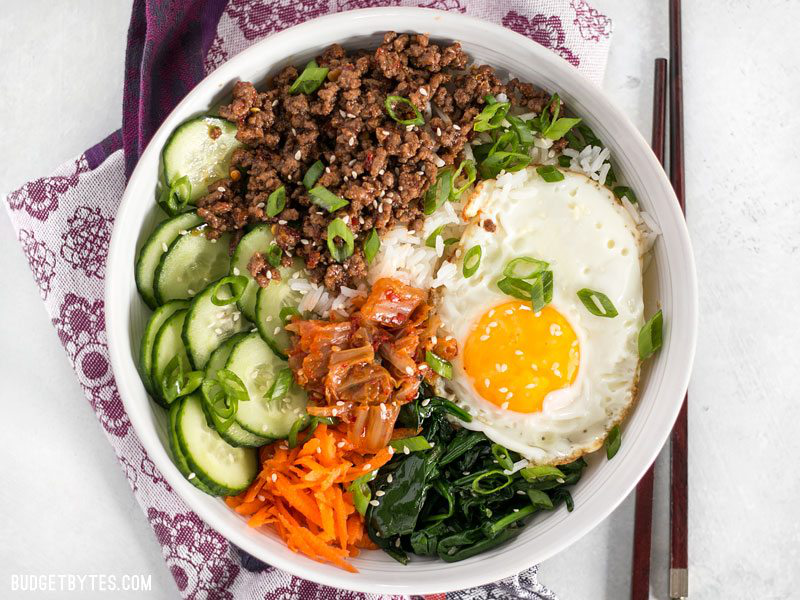

In [10]:
bibimbap

In [11]:
import sys
try:
    coreml_model.predict({'image' : bibimbap})
except Exception as inst:
    print "Could not perform model predictions", inst.args

Could not perform model predictions ('Model prediction is only supported on macOS version 10.13 or later.',)


## Save the CoreML model

_Note: the converted CoreML model will be stored in to [root](http://0.0.0.0:8888/tree/notebook). Please refer to [Apple's documentation](https://developer.apple.com/documentation/coreml) on how to use the CoreML model inside your App._

In [12]:
coreml_model.save('Food101Net.mlmodel')